In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [3]:
pivot12_mnmx=pd.read_csv('/content/drive/Shareddrives/Multicampus/Preprocessing/pivot12_mnmx.csv')
dummy_final=pd.read_csv("/content/drive/Shareddrives/Multicampus/Preprocessing/0414_dummy(최종).csv")

In [6]:
df=dummy_final.merge(pivot12_mnmx, on='SUBJECT_ID', how='inner')
df.head()

SUBJECT_ID  AGE  staytime  ... 51275_max  51279_max  51301_max
0          22   64         2  ...       NaN        NaN        NaN
1          24   39         3  ...      22.5       4.44        9.8
2          25   58         4  ...      41.6       3.71       13.0
3          28   74         6  ...      31.8        NaN        NaN
4          30   90         6  ...      43.1       3.11       14.1

[5 rows x 108 columns]

In [5]:
df2=pd.read_csv('/content/drive/Shareddrives/Multicampus/시각화/data1.csv')
df2.head()

Unnamed: 0  SUBJECT_ID  ...         ADMISSION_LOCATION    ethnic
0           0           3  ...       EMERGENCY ROOM ADMIT  Unknown 
1           1           4  ...       EMERGENCY ROOM ADMIT     White
2           2           6  ...  PHYS REFERRAL/NORMAL DELI     White
3           3           9  ...       EMERGENCY ROOM ADMIT   Latino 
4           4          11  ...       EMERGENCY ROOM ADMIT     White

[5 rows x 117 columns]

# 1차 자료

# diagnosis

In [7]:
diagnosis=df.iloc[:,4:21]
diagnosis.head()

blood  circulatory  congenital  ...  prenatal  respiratory  skin
0      0            1           0  ...         0            0     0
1      0            2           0  ...         0            0     0
2      0            3           0  ...         0            0     0
3      0            4           0  ...         0            1     0
4      0            6           0  ...         0            0     0

[5 rows x 17 columns]

In [8]:
# 진단받은 질병 기준

In [9]:
diagnosis_sum=diagnosis.sum()
diagnosis_sum

blood            11813
circulatory      73117
congenital        1098
digestive        19278
endocrine        35760
genitourinary    15368
infectious        9286
injury           62479
mental           13549
misc             12382
muscular          6478
neoplasms         7506
nervous          11371
pregnancy          465
prenatal          3092
respiratory      22608
skin              3899
dtype: int64

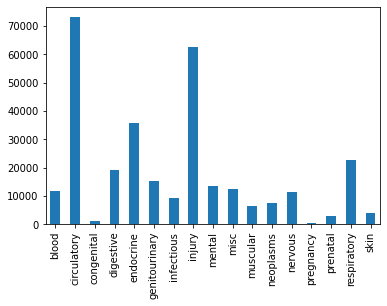

In [10]:
diagnosis_sum.plot(kind='bar')
plt.show()

In [11]:
# 환자수 기준

In [12]:
diagnosis_cnt=diagnosis[diagnosis.iloc[:,:]!=0].count()
diagnosis_cnt

blood             9170
circulatory      22670
congenital        1003
digestive        10536
endocrine        18872
genitourinary    10530
infectious        6803
injury           20362
mental            8845
misc              8848
muscular          4945
neoplasms         4609
nervous           7848
pregnancy          125
prenatal          2895
respiratory      13044
skin              2755
dtype: int64

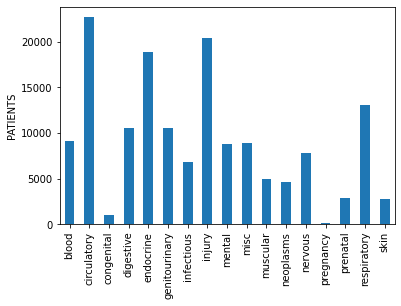

In [13]:
diagnosis_cnt.plot(kind='bar')
plt.ylabel('PATIENTS')
plt.show()

# admission_type

In [14]:
admission_type=df[['ADMTYPE_ELECTIVE','ADMTYPE_EMERGENCY', 'ADMTYPE_URGENT']]
admission_type.columns=['ELECTIVE','EMERGENCY', 'URGENT']
admission_type

ELECTIVE  EMERGENCY  URGENT
0             0          1       0
1             0          1       0
2             0          1       0
3             1          0       0
4             0          0       1
...         ...        ...     ...
27684         0          1       0
27685         1          0       0
27686         0          1       0
27687         0          1       0
27688         1          0       0

[27689 rows x 3 columns]

In [15]:
admission_type_cnt=admission_type.sum()
admission_type_cnt

ELECTIVE      4618
EMERGENCY    22323
URGENT         748
dtype: int64

In [16]:
admission_type_cnt.name='admission type'

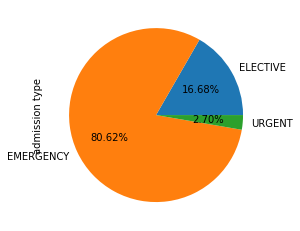

In [17]:
admission_type_cnt.plot.pie(autopct="%.2f%%")
plt.show()

# INSURANCE

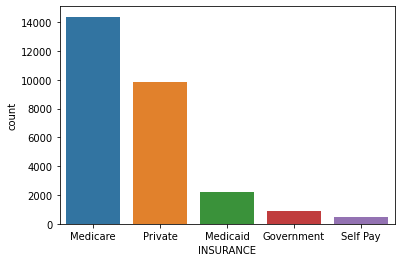

In [18]:
sns.countplot(x="INSURANCE", data=df2)

In [20]:
insurance=df[['INS_Government','INS_Medicaid','INS_Medicare','INS_Private','INS_Self Pay']]
insurance.columns=['government','medicaid','medicare','private','self pay']

In [21]:
insurance_cnt=insurance.sum()
insurance_cnt.name='insurance'
insurance_cnt

government      864
medicaid       2173
medicare      14376
private        9836
self pay        440
Name: insurance, dtype: int64

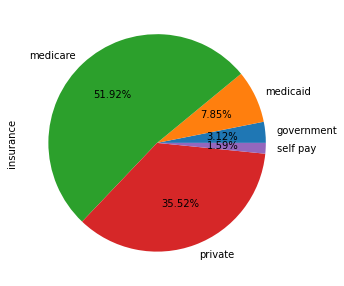

In [22]:
insurance_cnt.plot.pie(autopct="%.2f%%", subplots='True', figsize=(15,5))
plt.show()

# MARITAL_STATUS

In [23]:
marital_status=df[['MAR_DIVORCED','MAR_LIFE PARTNER','MAR_MARRIED','MAR_SEPARATED','MAR_SINGLE','MAR_UNKNOWN (DEFAULT)','MAR_WIDOWED']]
marital_status.columns=['divorced','partner','marreid','seperated','single','unknown','widowed']
marital_status.head()

divorced  partner  marreid  seperated  single  unknown  widowed
0         0        0        1          0       0        0        0
1         0        0        0          0       1        0        0
2         0        0        1          0       0        0        0
3         0        0        1          0       0        0        0
4         0        0        1          0       0        0        0

In [24]:
marital_status_cnt=marital_status.sum()
marital_status_cnt.name='marital_status'
marital_status_cnt

divorced      1642
partner         10
marreid      13265
seperated      259
single        6671
unknown       2014
widowed       3828
Name: marital_status, dtype: int64

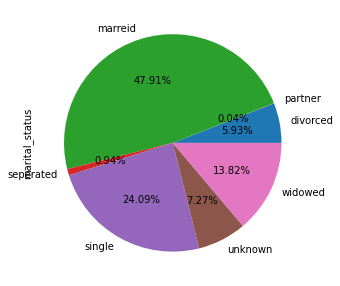

In [25]:
marital_status_cnt.plot.pie(autopct="%.2f%%", subplots='True', figsize=(15,5))
plt.show()

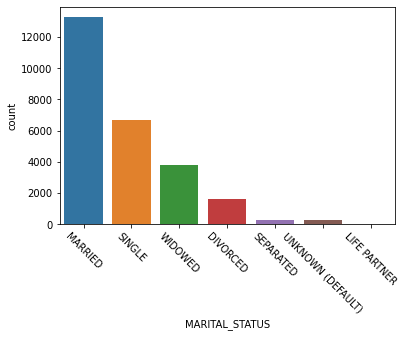

In [26]:
sns.countplot(x="MARITAL_STATUS", data=df2)
plt.xticks(rotation = - 45 )
plt.show()

# staytime

In [27]:
staytime=df.pivot_table('SUBJECT_ID',index='staytime',aggfunc='count')
staytime.rename(columns={'SUBJECT_ID':'count'}, inplace=True)
staytime.reset_index(level=0, inplace=True)
staytime.head()

staytime  count
0         0     36
1         1    976
2         2   1477
3         3   2151
4         4   2440

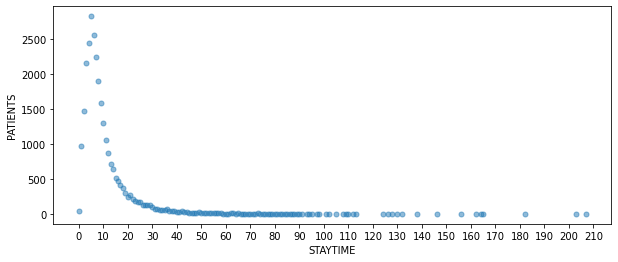

In [28]:
plt.figure(figsize=(10,4))
plt.plot('staytime',  # x
         'count',  # y
         data=staytime, 
         linestyle='none', 
         marker='o', 
         markersize=5,
         alpha=0.5)
plt.xlabel('STAYTIME')
plt.ylabel('PATIENTS')
plt.xticks(np.arange(0, 220, 10))
plt.show()

# 2차 자료

# AGE X (EXPIRE)

In [29]:
def get_per(group):
  return round(group.HOSPITAL_EXPIRE_FLAG.sum()/group.HOSPITAL_EXPIRE_FLAG.count()*100,1)

age_exp_per=df.groupby('AGEG1').apply(get_per)
age_exp_per

AGEG1
10's          3.6
20's          5.4
30's          6.0
40's          8.9
50's          9.7
60's         12.0
70's         15.3
80's         21.1
over 90's    25.2
dtype: float64

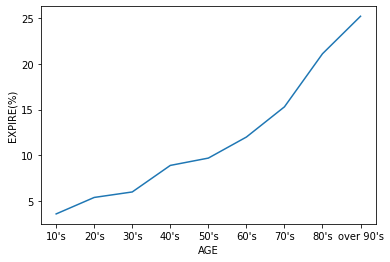

In [30]:
age_exp_per.plot()
plt.xlabel('AGE')
plt.ylabel('EXPIRE(%)')
plt.show()

# AGE X (ADMISSION_TYPE)

In [31]:
# 비율

In [32]:
def get_per2(group):
  return round(group.groupby('ADMISSION_TYPE').SUBJECT_ID.count()/group.SUBJECT_ID.count()*100,2)
  
age_admtype_per=df2.groupby(['AGEG1']).apply(get_per2)
age_admtype_per

ADMISSION_TYPE  ELECTIVE  EMERGENCY  URGENT
AGEG1                                      
10's                1.62      97.08    1.30
20's                5.35      92.77    1.88
30's               10.66      86.50    2.85
40's               15.27      82.11    2.61
50's               20.32      76.78    2.91
60's               22.78      74.39    2.83
70's               20.79      76.24    2.97
80's               11.43      85.98    2.59
over 90's           3.60      94.52    1.87

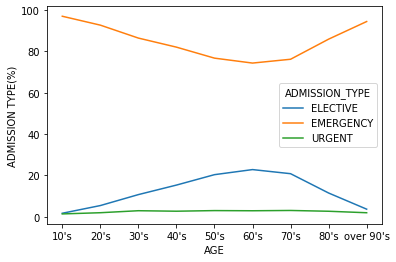

In [33]:
age_admtype_per.plot()
plt.xlabel('AGE')
plt.ylabel('ADMISSION TYPE(%)')
plt.show()

In [34]:
# 수

In [35]:
age_admtype=df2.pivot_table('SUBJECT_ID',index='AGEG1',columns='ADMISSION_TYPE',aggfunc='count')

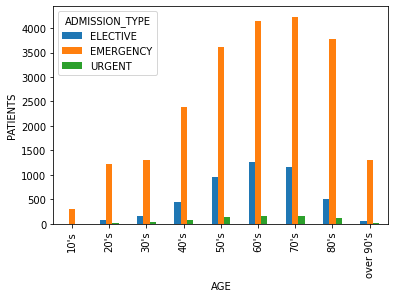

In [36]:
age_admtype.plot.bar()
plt.xlabel('AGE')
plt.ylabel('PATIENTS')
plt.show()

In [37]:
age_admtype1=df2.pivot_table('SUBJECT_ID',columns='HOSPITAL_EXPIRE_FLAG',index='ADMISSION_TYPE',aggfunc='count')
age_admtype1

HOSPITAL_EXPIRE_FLAG      0     1
ADMISSION_TYPE                   
ELECTIVE               4485   133
EMERGENCY             18879  3444
URGENT                  643   105

Text(0, 0.5, 'PATIENTS')

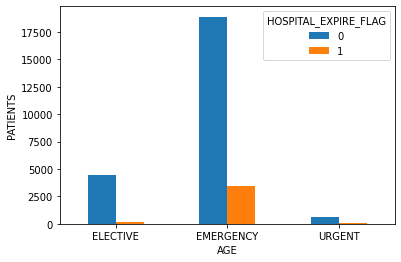

In [38]:
age_admtype1.plot.bar(rot=0)
plt.xlabel('AGE')
plt.ylabel('PATIENTS')


In [39]:
age_admtype2=df2.pivot_table('SUBJECT_ID',columns=['HOSPITAL_EXPIRE_FLAG',"AGEG2"],index='ADMISSION_TYPE',aggfunc='count')
age_admtype2

HOSPITAL_EXPIRE_FLAG            0           ...       1            
AGEG2                middle_adult   senior  ...  senior young_adult
ADMISSION_TYPE                              ...                    
ELECTIVE                    919.0   3435.0  ...   112.0         NaN
EMERGENCY                  4343.0  12558.0  ...  2848.0       122.0
URGENT                      149.0    452.0  ...    84.0         NaN

[3 rows x 6 columns]

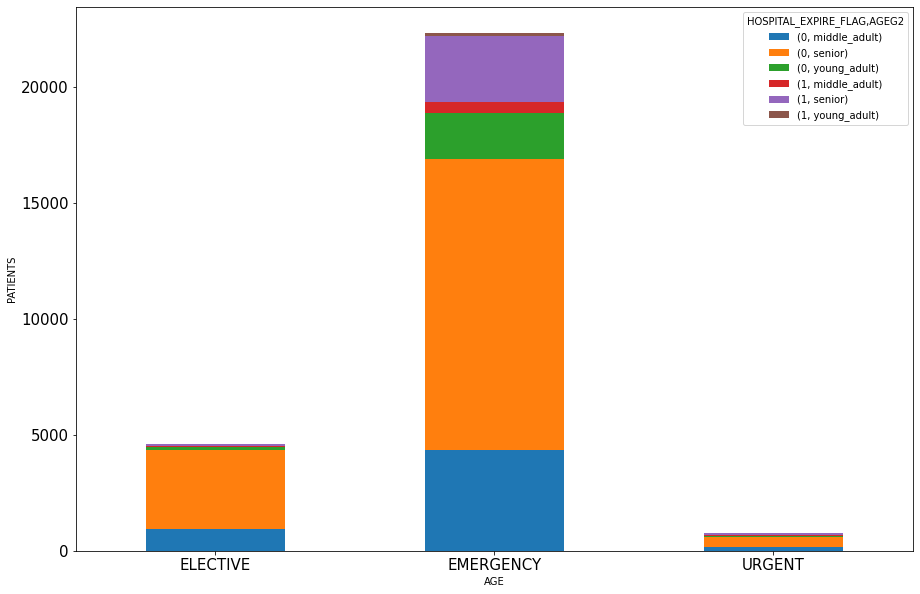

In [40]:
age_admtype2.plot.bar(rot=0,stacked=True,figsize=(15,10),fontsize=15)
plt.xlabel('AGE')
plt.ylabel('PATIENTS')
plt.savefig('dead_age_admission.png')

# AGE X (staytime)

In [41]:
age_stay=df2.groupby('AGEG1')[['staytime']].mean()
age_stay

staytime
AGEG1               
10's        7.448052
20's        9.373775
30's        9.752482
40's       10.320949
50's        9.904772
60's       10.245567
70's       10.221582
80's        9.594545
over 90's   7.718097

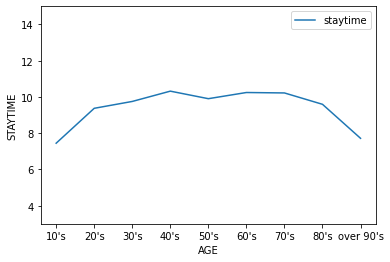

In [42]:
age_stay.plot()
plt.ylim(3,15)
plt.ylabel('STAYTIME')
plt.xlabel('AGE')
plt.show()

# AGE X (icd9)

In [45]:
icd=df.iloc[:,0:21]
del icd['AGE']
del icd['staytime']
del icd['new_code']
icd.head()

SUBJECT_ID  blood  circulatory  ...  prenatal  respiratory  skin
0          22      0            1  ...         0            0     0
1          24      0            2  ...         0            0     0
2          25      0            3  ...         0            0     0
3          28      0            4  ...         0            1     0
4          30      0            6  ...         0            0     0

[5 rows x 18 columns]

In [46]:
ageg2=df[['AGEG2','SUBJECT_ID']]

In [47]:
icd_ageg2=x.merge(y, on='SUBJECT_ID', how='inner')
del icd_ageg2['SUBJECT_ID']
icd_ageg2.head()

blood  circulatory  congenital  ...  respiratory  skin         AGEG2
0      0            1           0  ...            0     0        senior
1      0            2           0  ...            0     0  middle_adult
2      0            3           0  ...            0     0        senior
3      0            4           0  ...            1     0        senior
4      0            6           0  ...            0     0        senior

[5 rows x 18 columns]

In [49]:
diag=icd_ageg2.columns

In [50]:
icd9_sum=icd_ageg2.groupby('AGEG2')[diag].sum()
icd9_sum

blood  circulatory  congenital  ...  prenatal  respiratory  skin
AGEG2                                         ...                             
middle_adult   2531         9480         386  ...       793         4364   730
senior         8479        62438         588  ...      1985        16888  2970
young_adult     803         1199         124  ...       314         1356   199

[3 rows x 17 columns]

In [ ]:
# middle_adult 데이터프레임 만들기

In [51]:
middle_adult=pd.DataFrame(icd9_sum.iloc[0].sort_values(ascending = False)[:3]).T
middle_adult

injury  circulatory  endocrine
middle_adult   12815         9480       6392

In [52]:
middle_adult['etc']=icd9_sum.sum(axis=1)[0] - middle_adult.sum(axis=1)
middle_adult

injury  circulatory  endocrine    etc
middle_adult   12815         9480       6392  30424

In [53]:
# senior 데이터프레임 만들기

In [54]:
senior=pd.DataFrame(icd9_sum.iloc[1].sort_values(ascending = False)[:3]).T
senior

circulatory  injury  endocrine
senior        62438   42094      27988

In [55]:
senior['etc']=icd9_sum.sum(axis=1)[1] - senior.sum(axis=1)
senior

circulatory  injury  endocrine    etc
senior        62438   42094      27988  98813

In [56]:
# young_adult	 데이터프레임 만들기

In [57]:
young_adult=pd.DataFrame(icd9_sum.iloc[2].sort_values(ascending = False)[:3]).T
young_adult	

injury  mental  endocrine
young_adult    7570    1838       1380

In [58]:
young_adult['etc']=icd9_sum.sum(axis=1)[2] - young_adult.sum(axis=1)
young_adult	

injury  mental  endocrine   etc
young_adult    7570    1838       1380  8317

In [59]:
# AGEG2 기준 확인

In [60]:
df.groupby('AGEG2')[['AGE']].max()

AGE
AGEG2            
middle_adult   54
senior         90
young_adult    34

In [61]:
df.groupby('AGEG2')[['AGE']].min()

AGE
AGEG2            
middle_adult   35
senior         55
young_adult    15

In [62]:
# young_adult : 15~34
# middle_adult : 35~54
# senior : 55~ 

In [63]:
# 파이차트

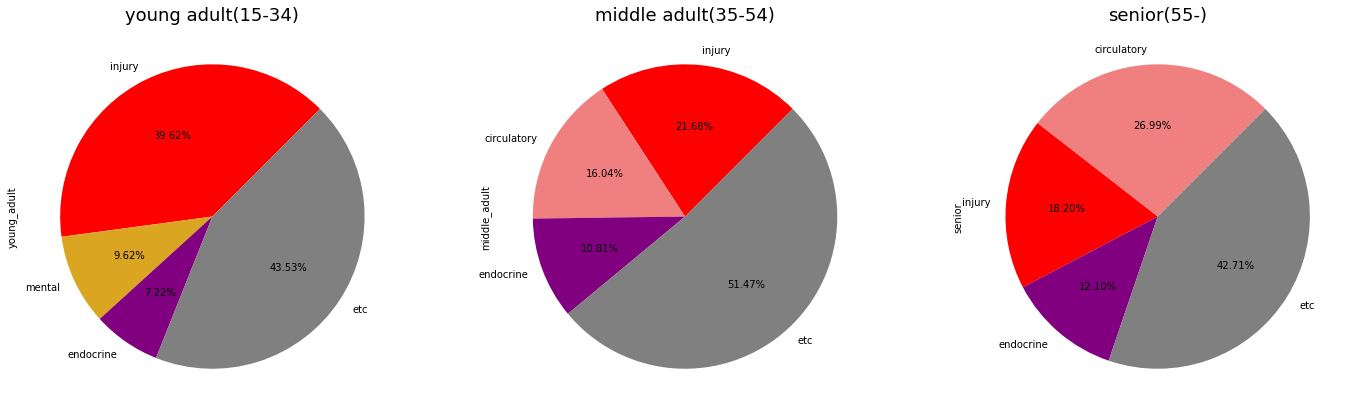

In [64]:
plt.subplot(131)
plt.title('young adult(15-34)', size=18)
young_adult.T['young_adult'].plot(kind='pie',
                                  labels=young_adult.columns,
                                  startangle=45, 
                                  autopct=lambda p : '{:.2f}%'.format(p), 
                                  colors = ['red','goldenrod','purple','grey'],
                                  figsize=(24,7),
                                  )

plt.subplot(132)
plt.title('middle adult(35-54)', size=18)
middle_adult.T['middle_adult'].plot(kind='pie',
                                  labels=middle_adult.columns,
                                  startangle=45, 
                                  autopct=lambda p : '{:.2f}%'.format(p), 
                                  colors = ['red','lightcoral','purple','grey'],
                                  figsize=(24,7)
                                  )

plt.subplot(133)
plt.title('senior(55-)', size=18)
senior.T['senior'].plot(kind='pie',
                                  labels=senior.columns,
                                  startangle=45, 
                                  autopct=lambda p : '{:.2f}%'.format(p), 
                                  colors = ['lightcoral','red','purple','grey'],
                                  figsize=(24,7)
                                  )
plt.show()

# staytime X (EXPIRE)

In [65]:
df2.groupby('staytime')[['HOSPITAL_EXPIRE_FLAG']].sum()

HOSPITAL_EXPIRE_FLAG
staytime                      
0                           36
1                          501
2                          373
3                          305
4                          240
...                        ...
164                          0
165                          0
182                          0
203                          0
207                          1

[119 rows x 1 columns]

In [66]:
def exp(group):
  if group.SUBJECT_ID.count()>=10:
    return round(group.HOSPITAL_EXPIRE_FLAG.sum()/group.SUBJECT_ID.count()*100,2)

staytime_exp_per=df2.groupby('staytime').apply(exp)
staytime_exp_per

staytime
0      100.00
1       51.33
2       25.25
3       14.18
4        9.84
        ...  
164       NaN
165       NaN
182       NaN
203       NaN
207       NaN
Length: 119, dtype: float64

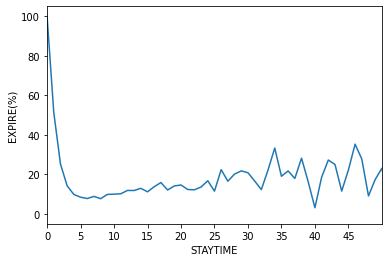

In [67]:
staytime_exp_per.plot()
plt.xlim(0,50)
plt.xticks(np.arange(0, 50, 5))
plt.xlabel('STAYTIME')
plt.ylabel('EXPIRE(%)')
plt.show()

# staytime X (icd9)

In [69]:
icd=df.iloc[:,0:21]
del icd['AGE']
del icd['staytime']
del icd['new_code']
icd.head()

SUBJECT_ID  blood  circulatory  ...  prenatal  respiratory  skin
0          22      0            1  ...         0            0     0
1          24      0            2  ...         0            0     0
2          25      0            3  ...         0            0     0
3          28      0            4  ...         0            1     0
4          30      0            6  ...         0            0     0

[5 rows x 18 columns]

In [72]:
staytime=df2[['SUBJECT_ID','staytime']]

In [73]:
staytime_icd9=icd.merge(staytime, on='SUBJECT_ID', how='inner')
del staytime_icd9['SUBJECT_ID']

In [74]:
staytime_icd9.head()

blood  circulatory  congenital  ...  respiratory  skin  staytime
0      0            1           0  ...            0     0         2
1      0            2           0  ...            0     0         3
2      0            3           0  ...            0     0         4
3      0            4           0  ...            1     0         6
4      0            6           0  ...            0     0         6

[5 rows x 18 columns]

In [75]:
staytime_icd9_nan=staytime_icd9[staytime_icd9[:]!=0]
staytime_icd9_nan.head()

blood  circulatory  congenital  ...  respiratory  skin  staytime
0    NaN          1.0         NaN  ...          NaN   NaN       2.0
1    NaN          2.0         NaN  ...          NaN   NaN       3.0
2    NaN          3.0         NaN  ...          NaN   NaN       4.0
3    NaN          4.0         NaN  ...          1.0   NaN       6.0
4    NaN          6.0         NaN  ...          NaN   NaN       6.0

[5 rows x 18 columns]

In [76]:
diag=staytime_icd9_nan.columns

In [77]:
diag=diag[:-1]

In [78]:
for i in diag:
  data=staytime_icd9_nan[i]
  for v in range(27689):
    if data[v]>=1:
      data[v]=staytime_icd9_nan['staytime'][v]

In [79]:
staytime_icd9_mean=staytime_icd9_nan[diag].mean()

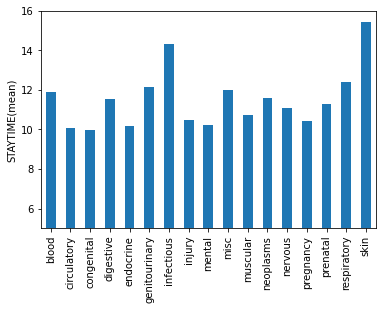

In [80]:
staytime_icd9_mean.plot(kind='bar')
plt.ylim(5,16)
plt.ylabel('STAYTIME(mean)')
plt.show()

In [81]:
diagnosis=df.iloc[:,4:21]
diagnosis.head()

blood  circulatory  congenital  ...  prenatal  respiratory  skin
0      0            1           0  ...         0            0     0
1      0            2           0  ...         0            0     0
2      0            3           0  ...         0            0     0
3      0            4           0  ...         0            1     0
4      0            6           0  ...         0            0     0

[5 rows x 17 columns]

# 병원내 사망자 질병 순위

In [82]:
x=df.iloc[:,0:21]
del x['AGE']
del x['staytime']
del x['new_code']
x.head()

SUBJECT_ID  blood  circulatory  ...  prenatal  respiratory  skin
0          22      0            1  ...         0            0     0
1          24      0            2  ...         0            0     0
2          25      0            3  ...         0            0     0
3          28      0            4  ...         0            1     0
4          30      0            6  ...         0            0     0

[5 rows x 18 columns]

In [83]:
y=df2[['SUBJECT_ID','HOSPITAL_EXPIRE_FLAG']]
y.head()

SUBJECT_ID  HOSPITAL_EXPIRE_FLAG
0           3                     0
1           4                     0
2           6                     0
3           9                     1
4          11                     0

In [84]:
expire_icd=x.merge(y, on='SUBJECT_ID', how='inner')
expire_icd=expire_icd[expire_icd['HOSPITAL_EXPIRE_FLAG']==1]
del expire_icd['SUBJECT_ID']
expire_icd.reset_index(drop=True, inplace=True)
expire_icd.head()

blood  circulatory  congenital  ...  respiratory  skin  HOSPITAL_EXPIRE_FLAG
0      0            2           0  ...            2     0                     1
1      0            2           0  ...            0     0                     1
2      1            1           0  ...            1     0                     1
3      1            3           0  ...            0     0                     1
4      0            1           0  ...            1     0                     1

[5 rows x 18 columns]

In [85]:
# sum

In [86]:
expire_icd_sum=expire_icd.sum()
del expire_icd_sum['HOSPITAL_EXPIRE_FLAG']
expire_icd_sum

blood             2118
circulatory      10626
congenital          88
digestive         3657
endocrine         5425
genitourinary     3061
infectious        2246
injury            8864
mental            1311
misc              2568
muscular           724
neoplasms         1656
nervous           1939
pregnancy            4
prenatal           434
respiratory       5089
skin               691
dtype: int64

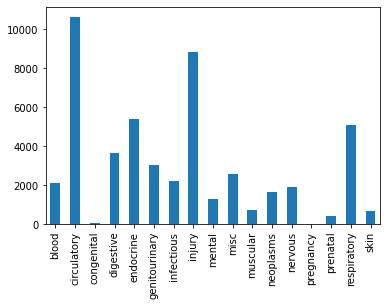

In [87]:
expire_icd_sum.plot(kind='bar')
plt.show()

In [88]:
# count

In [89]:
expire_icd_cnt=expire_icd[expire_icd.iloc[:,:]!=0].count()
del expire_icd_cnt['HOSPITAL_EXPIRE_FLAG']
expire_icd_cnt

blood            1457
circulatory      3250
congenital         81
digestive        1681
endocrine        2682
genitourinary    2128
infectious       1587
injury           2841
mental            966
misc             1806
muscular          566
neoplasms         902
nervous          1260
pregnancy           4
prenatal          400
respiratory      2647
skin              443
dtype: int64

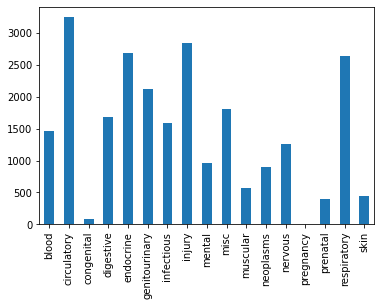

In [90]:
expire_icd_cnt.plot(kind='bar')
plt.show()

In [91]:
expire_df=pd.DataFrame(expire_icd_sum).rename(columns={0:'expire'})

In [92]:
diagnosis_sum

blood            11813
circulatory      73117
congenital        1098
digestive        19278
endocrine        35760
genitourinary    15368
infectious        9286
injury           62479
mental           13549
misc             12382
muscular          6478
neoplasms         7506
nervous          11371
pregnancy          465
prenatal          3092
respiratory      22608
skin              3899
dtype: int64

In [93]:
diagnosis_sum_df=pd.DataFrame(diagnosis_sum).rename(columns={0:'total'})

In [94]:
expire_df=expire_df.join(diagnosis_sum_df, how='left')
expire_df.head()

expire  total
blood          2118  11813
circulatory   10626  73117
congenital       88   1098
digestive      3657  19278
endocrine      5425  35760

In [95]:
expire_df['expire(%)']=round(expire_df['expire']/expire_df['total']*100,2)
expire_df

expire  total  expire(%)
blood            2118  11813      17.93
circulatory     10626  73117      14.53
congenital         88   1098       8.01
digestive        3657  19278      18.97
endocrine        5425  35760      15.17
genitourinary    3061  15368      19.92
infectious       2246   9286      24.19
injury           8864  62479      14.19
mental           1311  13549       9.68
misc             2568  12382      20.74
muscular          724   6478      11.18
neoplasms        1656   7506      22.06
nervous          1939  11371      17.05
pregnancy           4    465       0.86
prenatal          434   3092      14.04
respiratory      5089  22608      22.51
skin              691   3899      17.72

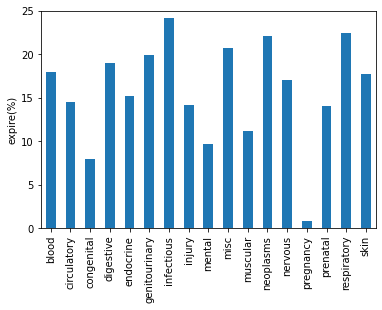

In [96]:
expire_df['expire(%)'].plot(kind='bar')
plt.ylim(0,25)
plt.ylabel('expire(%)')
plt.show()

# undersampling EXPIE 비교

In [97]:
patients=pd.read_csv('/content/drive/Shareddrives/Multicampus/mimic-iii-clinical-database-1.4/PATIENTS.csv.gz')
under_id=pd.read_csv('/content/drive/Shareddrives/Multicampus/Preprocessing/undersampling_id.csv')
under_id.head()

SUBJECT_ID
0       15412
1       46614
2       74459
3        8386
4       28468

In [98]:
patients_under=patients.merge(under_id, on='SUBJECT_ID', how='inner')
patients_under.head()

ROW_ID  SUBJECT_ID  ...              DOD_SSN EXPIRE_FLAG
0     235         250  ...                  NaN           1
1     236         251  ...                  NaN           0
2     249         266  ...                  NaN           0
3     253         270  ...                  NaN           0
4     629         666  ...  2139-11-20 00:00:00           1

[5 rows x 8 columns]

In [101]:
# undersampling 후

In [99]:
expire_under=patients_under[['EXPIRE_FLAG']].value_counts()
expire_under.name='undersampling'
expire_under

EXPIRE_FLAG
1              5135
0              3807
Name: undersampling, dtype: int64

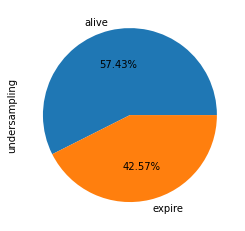

In [100]:
expire_under.plot(kind='pie',
                  labels=['alive','expire'],
                  autopct=lambda p : '{:.2f}%'.format(p))
plt.show()

In [102]:
# undersampling 전

In [103]:
expire=df2[['HOSPITAL_EXPIRE_FLAG']].value_counts()
expire.name='original'
expire

HOSPITAL_EXPIRE_FLAG
0                       24007
1                        3682
Name: original, dtype: int64

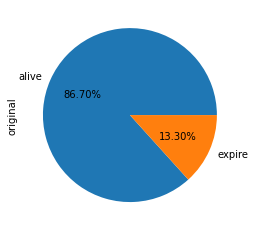

In [104]:
expire.plot(kind='pie',
                  labels=['alive','expire'],
                  autopct=lambda p : '{:.2f}%'.format(p))
plt.show()